In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../log/pov_prediction.csv')
df = df.sort_values('true_bcs')
df.head(1)

,cow_regno,true_bcs,run_time_0,run_time_1,run_time_2,run_time_3,run_time_4
55,501210889,3,5,5,6,4,6


In [43]:
cm = confusion_matrix(df['run_time_1'].values, df['true_bcs'].values)


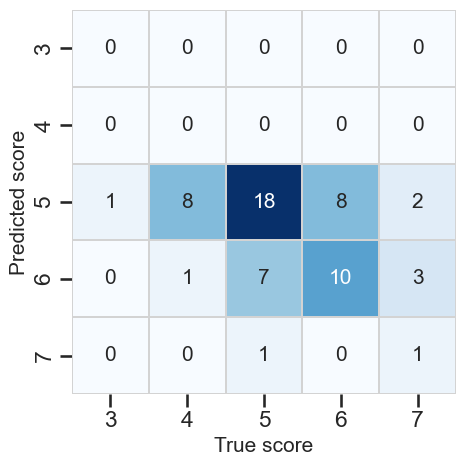

In [45]:
df_cm = pd.DataFrame(cm, index = [i for i in "34567"],
                     columns = [i for i in "34567"])
plt.figure(figsize=(5,5))
sn.heatmap(
    df_cm, 
    annot=True, 
    cmap="Blues", 
    annot_kws={"fontsize":15}, 
    cbar=False,
    linecolor='lightgray',
    linewidth=.1,
)
plt.ylabel('Predicted score', fontsize=15)
plt.xlabel('True score', fontsize=15)
# plt.axis('on')
plt.tight_layout()
plt.savefig('../media/confusion_matrix.pdf')

d:\Envs\work\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Envs\work\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: >

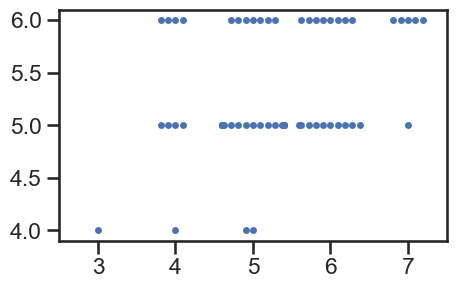

In [47]:

plt.figure(figsize=(5, 3))
sns.swarmplot(x=df['true_bcs'].values, y=df['run_time_3'].values)
# sns.despine()
# plt.ylim([2, 8])
# plt.xtick
# g = (g.set_axis_labels("Tip","Total bill(USD)").set(ylim=(2,8)))
# plt.ylim([1, 9])

In [48]:
# compute error of each class

In [50]:
errors = []
for cl in [3, 4, 5, 6, 7]:
    df_ = df[df['true_bcs']==cl]
    errors.append(mean_absolute_error(df_['true_bcs'].values, df_['run_time_3'].values))

In [51]:
errors

[1.0,
 1.3333333333333333,
 0.34615384615384615,
 0.5555555555555556,
 1.1666666666666667]

In [52]:
sum(errors)/ len(errors)

0.8803418803418804